# 0 Utils

In [1]:
import os
import numpy as np
import seaborn as sb
%matplotlib inline
# sb.set()
import matplotlib.pyplot as plt
import pandas as pd
import shap
import copy


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
N_JOBS = 6 # -1 ocupa todo los cores
RANDOM_STATE = 42 # para que sea reproducible

# 1 Predictors

In [4]:
predictors_set = dict()

no_is_time_price = [
    'is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut',
    'loc_comuna', 'loc_provincia', 'loc_region', 'sexo', 'tipo_cliente',
    'mean_cot_bod',
    'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
    'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
    'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
    'precio_cotizacion_median', 'precio_cotizacion_std', 
    
    'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
    'tiempo_cotizacion_std',   
    'Altos del Valle',
    'Edificio Urban 1470', 
#     'San Andres Del Valle', 
    'Edificio Mil610',
       'Edificio Junge']

predictors_set ['no_is_time_price'] = no_is_time_price

is_no_time_price = ['actividad', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'medio_inicial', 'sexo']

predictors_set ['is_no_time_price'] = is_no_time_price 

complete = [
    'actividad', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'medio_inicial', 'sexo'
    
    'mean_cot_bod',
    'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
    'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
    'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
    'precio_cotizacion_median', 'precio_cotizacion_std', 
    
    'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
    'tiempo_cotizacion_std',   
    'Altos del Valle',
    'Edificio Urban 1470', 
#     'San Andres Del Valle', 
    'Edificio Mil610',
       'Edificio Junge']

predictors_set [''] = complete 

# 1 Set Experiment

In [5]:
folder_results = 'resultados_negocio\\'

In [6]:
# dataset, base nro 2
dataset_nro = 8
experiment_nro = 1
# 'All Proyects', 'Altos del Valle', 'Edificio Urban 1470','San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge'
proyecto_select = 'San Andres Del Valle' #cambiable

# base, base_profesion, base_minusisprofesion, base_medini_isrec
use_predictors = 'no_is_time_price' #cambiable
# experimento 2 y 4 va con True
no_nulls = False #cambiable
sesgo = False #cambiable

In [7]:
# nombre experimento
exp_name = "{} {}".format(proyecto_select, use_predictors)
# eleccion dataset
dataset = 'personas_cotizacion{}.csv'.format(dataset_nro)

# DS_NAME = dataset.split('.')[0]
DS_NAME = exp_name

directory = '..\\results\\test_model_results_dataset{}'.format(dataset_nro)
import os
if not os.path.exists(directory):
    os.makedirs(directory)

folder = '..\\results\\model_results_dataset{}\\{}'.format(dataset_nro, DS_NAME)

if not os.path.exists(folder):
    os.mkdir(folder)

# 1 Load Dataset

In [8]:
personas = pd.read_csv('..\\..\\Datos\\experiments\\{}'.format(dataset), encoding = "ISO-8859-1")
personas_info = pd.read_excel('..\\..\\Datos\\experiments\\personas_cotizacion9.xlsx', encoding = "ISO-8859-1")

readme = dict()
readme['experiment_name'] = DS_NAME
readme['experiment_dataset'] = dataset

print(personas.shape)
readme['personas_shape'] = personas.shape
# personas.head(2)

# print(personas.columns)
readme['personas_columns'] = personas.columns.tolist()

(6155, 47)


In [9]:
personas.shape

(6155, 47)

In [10]:
personas.columns

Index(['Unnamed: 0', 'actividad', 'compra', 'is_apellido1', 'is_apellido2',
       'is_celular', 'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
       'precio_cotizacion_median', 'precio_cotizacion_std', 'rut', 'sexo',
       'tiempo_cotizacion_media', 'tiempo_cotizacion_median',
       'tiempo_cotizacion_std', 'tipo_cliente', 'valid_rut', 'Altos del Valle',
       'Edificio Urban 1470', 'San Andres Del Valle', 'Edificio Mil610',
       'Edificio Junge'],
      dtype='object')

In [11]:
# personas_info.reset_index(inplace=True)
personas_info.head()

,actividad,apellido1,apellido2,celular,compra,correo,direccion,edad,is_apellido1,is_apellido2,...,tiempo_cotizacion_median,tiempo_cotizacion_std,tipo_cliente,trabajo,valid_rut,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
0,Profesional,Garreton,NaN,0,0.0,mariacruz.garreton@gmail.com,NaN,Sin Información,1.0,0.0,...,0.0,0.0,Natural,Abogado,1.0,0.0,1.0,1.0,0.0,0.0
1,Empleado,Prado,NaN,562232326,0.0,gargolasdos@yahoo.es,NaN,Sin Información,1.0,0.0,...,0.0,0.0,Natural,NaN,1.0,0.0,0.0,0.0,1.0,0.0
2,Empleado,Norambuena,NaN,942825199,0.0,enorambuena@santander.cl,NaN,41-50,1.0,0.0,...,0.0,0.0,Natural,NaN,1.0,0.0,0.0,0.0,0.0,2.0
3,Profesional,Jury,Santibañez,56987290328,1.0,juryplastic@gmail.com,"Camino del Sur 472,Idahue",41-50,1.0,1.0,...,1250.0,0.0,Natural,Médico,1.0,0.0,0.0,0.0,0.0,2.0
4,sin información,Garcia,Carillo,97541759,0.0,pilidesotomayor@gmail.com,NaN,NaN,1.0,1.0,...,625.0,625.0,Natural,NaN,1.0,0.0,0.0,0.0,0.0,2.0


In [12]:
# Se pasan las variables categoricas que son objetos a variables categoricas
personas['loc_comuna'] = personas['loc_comuna'].astype('category')
personas['loc_provincia'] = personas['loc_provincia'].astype('category')
personas['loc_region'] = personas['loc_region'].astype('category')
personas['tipo_cliente'] = personas['tipo_cliente'].astype('category')
personas['sexo'] = personas['sexo'].astype('category')
personas['medio_inicial'] = personas['medio_inicial'].astype('category')
personas['actividad'] = personas['actividad'].astype('category')

personas_info['loc_comuna'] = personas_info['loc_comuna'].astype('category')
personas_info['loc_provincia'] = personas_info['loc_provincia'].astype('category')
personas_info['loc_region'] = personas_info['loc_region'].astype('category')
personas_info['tipo_cliente'] = personas_info['tipo_cliente'].astype('category')
personas_info['sexo'] = personas_info['sexo'].astype('category')
personas_info['medio_inicial'] = personas_info['medio_inicial'].astype('category')
personas_info['actividad'] = personas_info['actividad'].astype('category')

In [13]:
#como bkup


In [14]:
# Personas que solo cotizaron en un proyecto especifico
# Para E5D5, E6D5 #########################################
if proyecto_select != 'All Proyects':
    mask = (personas[proyecto_select] > 0)
    personas = personas[mask]
    print(personas[mask].shape)
    personas[mask]
    
    mask = (personas_info[proyecto_select] > 0)
    personas_info = personas_info[mask]
    print(personas_info[mask].shape)
    personas_info[mask]
###########################################################

predictors = predictors_set[use_predictors]

if no_nulls:
    personas.replace(['sin informacion'], np.nan, inplace=True)
    personas.dropna(inplace=True)

(3799, 47)
(3816, 55)


In [15]:
personas_original = copy.deepcopy(personas)
personas_original.shape

(3799, 47)

In [16]:
# Negocio como variable objetivo
p_target = pd.DataFrame(personas.compra) # Target)
p_target.head()
# p_n_index = p_negocio.index

,compra
0,False
5,False
7,False
8,False
9,False


In [17]:
# Cambio de [True, False] a [1, -1] para que salgan bien los resultados de la conf matrix
p_target.compra = [1 if x == True else -1 for x in p_target.compra]

personas = personas[predictors]

In [18]:
personas.to_excel('tmp.xlsx')

In [19]:
# p_negocio

In [20]:
# Corroborando que los largos de personas y sus variables objetivos sean iguales

print(p_target.shape)
print(personas.shape)
both = set(personas.index) & set(p_target.index)
print('Len', len(both))
      

print(personas.shape)


personas = pd.get_dummies(personas)
print(personas.shape)
# personas.describe()

(3799, 1)
(3799, 29)
Len 3799
(3799, 29)
(3799, 55)


In [21]:
personas.columns

Index(['is_recontacto', 'is_remoto', 'is_descuento', 'valid_rut',
       'mean_cot_bod', 'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu',
       'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta', 'nro_cot_estu',
       'nro_proyectos', 'precio_cotizacion_media', 'precio_cotizacion_median',
       'precio_cotizacion_std', 'tiempo_cotizacion_media',
       'tiempo_cotizacion_median', 'tiempo_cotizacion_std', 'Altos del Valle',
       'Edificio Urban 1470', 'Edificio Mil610', 'Edificio Junge',
       'loc_comuna_Chiguayante', 'loc_comuna_ConcepciÃ³n',
       'loc_comuna_Coronel', 'loc_comuna_HualpÃ©n', 'loc_comuna_Los Ãngeles',
       'loc_comuna_Otro', 'loc_comuna_Penco', 'loc_comuna_San Pedro de la Paz',
       'loc_comuna_Talcahuano', 'loc_provincia_Concepcion',
       'loc_provincia_Otro', 'loc_provincia_Santiago', 'loc_region_Bio-Bio',
       'loc_region_Metropolitana', 'loc_region_Otro', 'sexo_Femenino',
       'sexo_Masculino', 'sexo_sin informaciÃ³n', 'tipo_cliente_JurÃ­dico',
  

# 3 Supervised Learning: Classification

## 3.1 Libraries

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

from sklearn import svm
from xgboost import XGBClassifier

import itertools

from sklearn.model_selection import GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


## 3.2 Check the Dataset

In [23]:
print("Tamaño Total: ", personas.shape)
print("Personas que hicieron Negocio: ", p_target[p_target.negocio == True].shape)
print("Personas que no Hicieorn Negocio: ", p_target[p_target.negocio == -1].shape)
readme['personas_negocio'] = p_target[p_target.negocio == True].shape
readme['personas_nonegocio'] = p_target[p_target.negocio == -1].shape

Tamaño Total:  (3799, 55)


AttributeError: 'DataFrame' object has no attribute 'negocio'

## 3.4 Help Functions

In [24]:
import scikitplot as skplt

def classifier_insights(y_test, clf_probas, model, f_importance = False, model_name='Model'):
    
    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_cumulative_gain(y_test, clf_probas,\
                                                        figsize=(4,3), title="{} Gain Curve".format(model_name)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig(folder_results + '\\{}_cum_gain.png'.format(model_name), bbox_inches = 'tight', dpi=300)
    plt.show()


    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_lift_curve(y_test, clf_probas, figsize=(4,3)\
                                                  , title="{} Lift Curve".format(model_name)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig(folder_results + '\\{}_lift.png'.format(model_name), bbox_inches = 'tight', dpi=300)
    plt.show()
    
    if f_importance:
        fig = plt.figure()
        ax = plt.subplot(skplt.estimators.plot_feature_importances(
            model, feature_names=col_predictors, x_tick_rotation=90, figsize=(4,3)\
        , title="{} Feature Importance".format(model_name)))
        plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
        plt.savefig(folder_results + '\\{}_f_importance.png'.format(model_name), bbox_inches = 'tight', dpi=300)
        plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_precision_recall(y_test, clf_probas, figsize=(4,3)\
                                                        , title="{} Precision Recall".format(model_name)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig(folder_results + '\\{}_precition_recall.png'.format(model_name), bbox_inches = 'tight', dpi=300)
    plt.show()

    fig = plt.figure()
    ax = plt.subplot(skplt.metrics.plot_ks_statistic(y_test, clf_probas, figsize=(4,3)\
                                                    , title="{} KS Statistics".format(model_name)))
    plt.legend(loc=9, bbox_to_anchor=(1.15, 1), ncol=1)
    plt.savefig(folder_results + '\\{}_ks_sta.png'.format(model_name), bbox_inches = 'tight', dpi=300)
    plt.show()

In [25]:
import json
def save_readme():    
    exDict = {'readme': readme}
    with open('..\\results\\model_results_dataset{}\\{}\\readme_{}.txt'.format(dataset_nro, DS_NAME, DS_NAME), 'w') as file:
        file.write(str(exDict))

def plot_all_auc_values():
        
    d = dict()
    for key in roc_curves_to_plot[DS_NAME]:
        d[key] = roc_curves_to_plot[DS_NAME][key]['auc']
    
    s = [(k, d[k]) for k in sorted(d, key=d.get, reverse=True)]
    
    x_model = [x[0] for x in s]
    x_value = [x[1] for x in s]
    
    x = np.arange(len(roc_curves_to_plot[DS_NAME].keys()))
    
    f = plt.figure(figsize=(12,8))
    plt.title('{} AUC Models'.format(DS_NAME))
    plt.xlabel('Models')
    plt.ylabel('AUC')
    plt.bar(x, x_value)
    plt.xticks(x, x_model)
#     plt.savefig('..\\results\\model_results_dataset{}\\{}\\auc_models.png'.format(dataset_nro, DS_NAME,DS_NAME), dpi=300)
    plt.show()

def plot_all_roc_curves():
    
    f = plt.figure(figsize=(12,8))
    plt.plot([0, 1], [0, 1], 'k--')
    
    for key in roc_curves_to_plot[DS_NAME]:
        plt.plot(roc_curves_to_plot[DS_NAME][key]['fpr'], roc_curves_to_plot[DS_NAME][key]['tpr']) #fpr and tpr
    
    legends = ['random choice']
    legends.extend(roc_curves_to_plot[DS_NAME].keys())
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
#     plt.savefig('..\\results\\model_results_dataset{}\\{}\\roc_curve_all.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

In [26]:
# SAVE RESULTS
from sklearn.externals import joblib
import copy 
import json

# results_copy = copy.deepcopy(clfs_results)

def save_results(results, file_name='grid_results'):
    results_copy = copy.deepcopy(results)
    for clf in results_copy.keys():
        folder = folder_results + '\\models_persistance\\{}\\'.format(clf)

        if not os.path.exists(folder):
            os.mkdir(folder)

        for cv in results_copy[clf].keys():
            for key in results_copy[clf][cv]:
                if key == 'best_model':
                    to_save = results_copy[clf][cv][key]
                    joblib.dump(to_save,'{}{}_compra_model.joblib'.format(folder, clf))
                    results_copy[clf][cv][key] = 'saved'
                if key == 'grid_cvresults':
                    pd.DataFrame(results_copy[clf][cv]['grid_cvresults']).to_excel('{}{}_{}_grid_negocio.xlsx'.format(folder, clf, cv))
                    results_copy[clf][cv]['grid_cvresults'] = 'saved'


    with open('{}.json'.format(file_name), 'w') as fp:
        json.dump(results_copy, fp)

In [27]:
color_sequence = ['#f44242', '#f4eb41', '#acf441', '#285919', '#41f4eb',
                  '#4146f4', '#7041f4', '#593518', '#f441f1', '#f44173']

def battle_roc(clf, dr):
    f = plt.figure(figsize=(8,6))
    plt.plot([0, 1], [0, 1], 'k--')
    rank= 0
    legends = ['random choice']
    for cv, value in dr[clf].items():
        model =dr[clf][cv]['best_model']
        model.fit(X_grid,y_grid)
        y_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, treshold = roc_curve(y_test, y_proba)
        roc_auc = roc_auc_score(y_test, y_proba)
        legends.append('cv %i %.4f' %(cv, roc_auc))
        plt.plot(fpr, tpr, color=color_sequence[rank]) #fpr and tpr
        rank +=1
    plt.legend(legends)
    
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('{} Models ROC Curve'.format(DS_NAME))
#     plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_battle_roc_curve.png'.format(dataset_nro, DS_NAME, clf), dpi=300)
    plt.show()

In [28]:
def battle_cv(clf, results):
    data, cv_a, acc, rec, pre, auc, fs = [], [], [], [], [], [], []
    for cv in results[clf].keys():
        r = results[clf][cv]
        cv_a.append(cv);acc.append(r['acc']);rec.append(r['rec']);pre.append(r['pre'])
        auc.append(r['auc']);fs.append(r['fs'])
    metrics = [acc,rec,pre,auc,fs]
    metrics_name = ['acc','rec','pre','auc','fs']
    for i in range(len(metrics)):
        trace = go.Scatter(
            x = cv_a,
            y = metrics[i],
            name= metrics_name[i]
        )
        data.append(trace)
    return data

In [29]:
def view_results(results):
    for clf in results.keys():
        print("Classifier: ", clf)
        for cv in results[clf].keys():
                r = results[clf][cv]
                print(
            'cv: ', i,
            'acc %.4f' % r['acc'],
            '+- %.4f'% r['acc-std'],
            '| pre %.4f'% r['pre'],
            '+- %.4f'% r['pre-std'],
            '| rec %.4f'% r['rec'],
            '+- %.4f'% r['rec-std'],
            '| fs %.4f'% r['fs'],
            '+- %.4f'% r['fs-std'],
            '| auc %.4f'% r['auc'],
            '+- %.4f'% r['auc-std'],
             )

In [30]:
import plotly.plotly as py
import plotly.graph_objs as go
py.sign_in(api_key='vM02r1sRNCokCK2O04A3', username='jcardenas.lie')
# py.sign_in(api_key='GzJkEHgbGPp7aEmHy0BZ', username='japinoza')

def box_plot(results, metric):
    data = []

    for clf in results.keys():
        y = []
        for cv in results[clf].keys():
            y.append(results[clf][cv][metric])
        data.append(go.Box(
            y=y,
            name=clf
        ))
    layout = go.Layout(
        title = "Box Plot {}".format(metric)
    )

    fig = go.Figure(data=data, layout=layout)
    return fig

In [31]:
def battle_conf_matrix(clf, results):
    for cv in results[clf].keys():
        model =results[clf][cv]['best_model']
#         model.set_params(class_weight='balanced')
        model.fit(X_grid,y_grid)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:,1]
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print(tp, tn)
        print(classification_report(y_test, y_pred))
        print('Test: Recall: %.3f' % (tp/(tp+fp)), ' Precision: %.3f' % (tp/(tp+fn)))
        # predict_mine = np.where(y_proba > 0.989, 1, 0)
    #     print(confusion_matrix(y_test, y_pred))
    #     roc_curve_plot(model, X_test, y_test)
        plot_confusion_matrix(y_test, y_pred, ['Negocio', 'No Negocio'], \
                              normalize=True, title='Confusion Matrix {} cv:{}'.format(clf, cv))

In [32]:
def cumulative_gain_curve_m(y_true, y_score, pos_label=None):
    y_true, y_score = np.asarray(y_true), np.asarray(y_score)

    # ensure binary classification if pos_label is not specified
    classes = np.unique(y_true)
    if (pos_label is None and
        not (np.array_equal(classes, [0, 1]) or
             np.array_equal(classes, [-1, 1]) or
             np.array_equal(classes, [0]) or
             np.array_equal(classes, [-1]) or
             np.array_equal(classes, [1]))):
        raise ValueError("Data is not binary and pos_label is not specified")
    elif pos_label is None:
        pos_label = 1.

    # make y_true a boolean vector
    y_true = (y_true == pos_label)

    sorted_indices = np.argsort(y_score)[::-1]
    y_true = y_true[sorted_indices]
    gains = np.cumsum(y_true)

    percentages = np.arange(start=1, stop=len(y_true) + 1)

    gains = gains / float(np.sum(y_true))
    percentages = percentages / float(len(y_true))

    gains = np.insert(gains, 0, [0])
    percentages = np.insert(percentages, 0, [0])

    return percentages, gains

def plot_cumulative_gain_m(model, X_test, y_test, threshold=None):
    y_true = y_test

    predict_probabilities = model.predict_proba(X_test)
    
    if threshold:
        predict_mine = np.where(predict_probabilities > threshold, 1, 0)

    y_true = np.array(y_true)
    y_probas = np.array(predict_mine)

    classes = np.unique(y_true)
    if len(classes) != 2:
        raise ValueError('Cannot calculate Cumulative Gains for data with '
                         '{} category/ies'.format(len(classes)))

    # Compute Cumulative Gain Curves
    percentages, gains1 = cumulative_gain_curve_m(y_true, y_probas[:, 0], classes[0])
    percentages, gains2 = cumulative_gain_curve_m(y_true, y_probas[:, 1], classes[1])

    trace0 = go.Scatter(
        x = percentages,
        y = gains1,
        mode = 'lines+markers',
        name = 'class1'
    )

    trace1 = go.Scatter(
        x = percentages,
        y = gains2,
        mode = 'lines+markers',
        name = 'class2'
    )
    
   
    trace2 = go.Scatter(
        x = [0,1],
        y = [0,1],
        line = dict(
            color = ('rgb(205, 12, 24)'),
            width = 4,
            dash = 'dot'
        ),
        name = 'baseline'
    )
    
    data = [trace0, trace1, trace2]
    
    layout = dict(title = f'Cumulative Gains Curve',
              xaxis = dict(title = 'Porcentaje de la Muestra (%)'),
              yaxis = dict(title = 'Gain'),
              )

    figure = go.Figure(data=data, layout=layout)

    return figure


def plot_lift_curve_m(clf, results, X_test, y_test, threshold = None):
    y_true = y_test
    data = []
    for cv in results[clf].keys():
        r = results[clf][cv]
        
#         model.fit(X_grid, y_grid)
        y_probas = model.predict_proba(X_test)
    
        if threshold:
            y_pred = np.where(predict_probabilities > threshold, 1, 0)

        y_true = np.array(y_true)

        classes = np.unique(y_true)
        if len(classes) != 2:
            raise ValueError('Cannot calculate Lift Curve for data with '
                             '{} category/ies'.format(len(classes)))

        # Compute Cumulative Gain Curves
        percentages, gains2 = cumulative_gain_curve_m(y_true, y_probas[:, 0], classes[0])

        percentages = percentages[1:]
        gains2 = gains2[1:]

        gains2 = gains2 / percentages

        trace1 = go.Scatter(
            x = percentages,
            y = gains2,
            mode = 'lines+markers',
            name = clf
        )
        data.append(trace1)
    
    trace2 = go.Scatter(
        x = [0,1],
        y = [1,1],
        line = dict(
            color = ('rgb(205, 12, 24)'),
            width = 4,
            dash = 'dot'
        ),
        name = 'baseline'
    )
    data.append(trace2)
    
    layout = dict(title = 'Lift Curve',
              xaxis = dict(title = 'Porcentaje de la Muestra (%)'),
              yaxis = dict(title = 'Gain'),
              )
    return {'data':data, 'layout':layout}

In [33]:
def plot_importance_graph(model):
    features = personas.columns
    
    feature_importance = model.best_estimator_.feature_importances_ 
    fig = plt.figure(figsize=(20, 18))
    ax = fig.add_subplot(111)

    df_f = pd.DataFrame(feature_importance, columns=["importance"])
    df_f["labels"] = features
    df_f.sort_values("importance", inplace=True, ascending=False)
    display(df_f.head(5))

    index = np.arange(len(feature_importance[:20]))
    bar_width = 0.5
    rects = plt.barh(index[:20] , df_f["importance"][:20], bar_width, alpha=0.4, color='b', label='Main')
    plt.yticks(index, df_f["labels"])
    plt.title("{} {} Feature Importance".format(DS_NAME, MODEL))
    plt.savefig('..\\results\\model_results_dataset{}\\{}\\{}_importance.png'.format(dataset_nro, DS_NAME, MODEL), dpi=300)
    plt.show()

    # Import necessary modules
def plot_confusion_matrix(y, y_pred, classes,
                        normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues, folder=''):
    
    cm = confusion_matrix(y, y_pred)
    tn, fp, fn, tp = cm.ravel()
    cm = np.array([[tp,fn],[fp,tn]])
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig = plt.figure(figsize=(4, 3))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.savefig(folder_results + '{}.png'.format(title), dpi=300)
    plt.show()


def roc_curve_plot(model, X_test, y_test, folder='', title='Model ROC Curve' ):
    
    # Compute predicted probabilities: y_pred_prob
    y_pred_prob = model.predict_proba(X_test_o)[:,1]

    # Generate ROC curve values: fpr, tpr, thresholds
    fpr, tpr, treshold = roc_curve(y_test_o, y_pred_prob)
    
    matrix = metrics.confusion_matrix(y_true=y_test_o, y_pred=model.predict(X_test_o))
    tn, fp, fn, tp = matrix.ravel()
    fpr_point = fp / (fp + tn)
    tpr_point = tp / (tp + fp)
    
    print("AUC: ",roc_auc_score(y_test_o, y_pred_prob))
    print("Point in ROC", fpr_point,tpr_point)

    # Plot ROC curve
#     plt.plot(fpr_point,tpr_point)
    markers_on = [fpr_point]
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.savefig(folder_results + '{}.png'.format(title), dpi=300)
    plt.show()
    
def grid_results(grid, scorer, plot=False):
    
    best_model = grid.best_estimator_
    
    grid_results = pd.DataFrame(grid.cv_results_)[['mean_train_accuracy',
       'mean_train_auc', 'mean_train_f1_score', 'mean_train_precision',
       'mean_train_recall','mean_test_accuracy',
       'mean_test_auc', 'mean_test_f1_score', 'mean_test_precision',
       'mean_test_recall','std_test_accuracy', 'std_test_auc', 'std_test_f1_score',
       'std_test_precision', 'std_test_recall',
        'std_train_accuracy', 'std_train_auc', 'std_train_f1_score',
       'std_train_precision', 'std_train_recall','rank_test_accuracy', 'rank_test_auc', 'rank_test_f1_score',
       'rank_test_precision', 'rank_test_recall', 'params']]
    
    grid_results = grid_results.sort_values(by='rank_test_{}'.format(scorer))
    
    matrix = metrics.confusion_matrix(y_true=y_test_o, y_pred=best_model.predict(X_test_o))
    tn, fp, fn, tp = matrix.ravel()
    
    print('Validation set:')
    print('tn', tn, 'fp', fp, 'fn', fn, 'tp', tp)
    a = (tp + tn) / (tn + fp + fn + tp)
    p = tp /(tp + fn)
    r = tp / (tp + fp)
    f = (2* p* r) / (p + r)
    auc = roc_auc_score(y_test_o, best_model.predict(X_test_o) )
    print('tpr: %.3f' % r, 'fpr %.3f' % (fp /(fp + tn)), 'auc %.2f '%auc)
    print('a: %.3f' % a, 'p %.3f' % p, 'r %.3f' % r, 'f %.3f'% f )
    print('TN %.2f'%(tn/(tn+fp)), 'TP %.2f'% p)
    
    return {
        'ts_acc':grid_results.loc[0,'mean_test_accuracy'],
        'ts_acc-std':grid_results.loc[0,'std_test_accuracy'],
        'ts_pre':grid_results.loc[0,'mean_test_precision'],
        'ts_pre-std':grid_results.loc[0,'std_test_precision'],
        'ts_rec':grid_results.loc[0,'mean_test_recall'],
        'ts_rec-std':grid_results.loc[0,'std_test_recall'],
        'ts_fs':grid_results.loc[0,'mean_test_f1_score'],
        'ts_fs-std':grid_results.loc[0,'std_test_f1_score'],
        'ts_auc':grid_results.loc[0,'mean_test_auc'],
        'ts_auc-std':grid_results.loc[0,'std_test_auc'],
        'tr_acc':grid_results.loc[0,'mean_train_accuracy'],
        'tr_acc-std':grid_results.loc[0,'std_train_accuracy'],
        'tr_pre':grid_results.loc[0,'mean_train_precision'],
        'tr_pre-std':grid_results.loc[0,'std_train_precision'],
        'tr_rec':grid_results.loc[0,'mean_train_recall'],
        'tr_rec-std':grid_results.loc[0,'std_train_recall'],
        'tr_fs':grid_results.loc[0,'mean_train_f1_score'],
        'tr_fs-std':grid_results.loc[0,'std_train_f1_score'],
        'tr_auc':grid_results.loc[0,'mean_test_auc'],
        'tr_auc-std':grid_results.loc[0,'std_test_auc'],
        'best_model': grid.best_estimator_,
        'grid_cvresults': grid.cv_results_,
    }

## 3.3 Train & Test

In [34]:
both = set(personas.index) & set(p_target.index)
len(both)

3799

In [35]:
# personas.reset_index(inplace=True)
# p_negocio.reset_index(inplace=True)
# my_indices = p_negocio.index

In [36]:
X = personas 
col_predictors = X.columns
y = p_target

#_grid para hacer cross_validation y _test_o para hacer validacion sobre datos no vistos
X_grid, X_test_o, y_grid, y_test_o = train_test_split(X, y \
                                                    ,test_size=0.2, random_state=RANDOM_STATE)
# X_grid, X_test_o, y_grid, y_test_o, indices_train, indices_test = train_test_split(X, y \
#                                                     , indices,test_size=0.2, random_state=RANDOM_STATE)
print(X_grid.shape, X_test_o.shape, y_grid.shape, y_test_o.shape)


X_test_o.to_excel('x_test_compra_{}.xlsx'.format(use_predictors))
y_test_o.to_excel('y_test_compra_{}.xlsx'.format(use_predictors))

(3039, 55) (760, 55) (3039, 1) (760, 1)


In [37]:
X_test_o.head(1)

,is_recontacto,is_remoto,is_descuento,valid_rut,mean_cot_bod,mean_cot_depto,mean_cot_esta,mean_cot_estu,nro_cot_bod,nro_cot_depto,...,medio_inicial_INTERNET,medio_inicial_LETREROS,medio_inicial_PRENSA,medio_inicial_RADIO,medio_inicial_RECONTACTO,medio_inicial_RECORRIDO POR EL SECTOR,medio_inicial_REFERIDOS,medio_inicial_REVISTAS,medio_inicial_TV,medio_inicial_VOLANTES
1573,True,True,False,True,0.0,1.0,0.0,0.0,0.0,13.0,...,0,1,0,0,0,0,0,0,0,0


In [38]:
personas_original.loc[1573]

Unnamed: 0                          1581
actividad                       Empleado
compra                             False
is_apellido1                        True
is_apellido2                        True
is_celular                          True
is_descuento                       False
is_direccion                       False
is_fnac                            False
is_nombre                           True
is_nombrecompleto                   True
is_nrofam                          False
is_presencial                       True
is_profesion                       False
is_recontacto                       True
is_remoto                           True
is_telefono                        False
loc_comuna                   ConcepciÃ³n
loc_provincia                 Concepcion
loc_region                       Bio-Bio
max_rango_edad                         0
mean_cot_bod                           0
mean_cot_depto                         1
mean_cot_esta                          0
mean_cot_estu   

In [39]:
# Los indices de arriba debieran ser los mismos

## 3.5 Models

In [40]:
clfs = dict()
clfs['LR'] = LogisticRegression(random_state=RANDOM_STATE)
clfs['DT'] = DecisionTreeClassifier(random_state=RANDOM_STATE)
clfs['RF'] = RandomForestClassifier(random_state=RANDOM_STATE)
# clfs['SVM'] = svm.SVC(kernel='rbf', probability=True, random_state=RANDOM_STATE)
clfs['KNN'] = KNeighborsClassifier()
clfs['PCAKNN'] = Pipeline([('pca', PCA(random_state=RANDOM_STATE)), ('clf', KNeighborsClassifier())])
clfs['XGB'] = XGBClassifier(random_state=RANDOM_STATE)

In [41]:
clf_params = dict()
clf_params['KNN'] = {'n_neighbors': np.arange(1, 20)}
clf_params['PCAKNN'] = {'pca__n_components': [2, 3, 4, 5, 6, 7, 8, 9]}
clf_params['LR'] = {'C': np.logspace(-5, 8, 15), 'penalty':['l1', 'l2'], 'class_weight':[None, 'balanced']}
clf_params['DT'] = {"max_depth": range(1,20),"max_features":range(1,30), 
                    "min_samples_leaf": range(1,10),"criterion": ["gini", "entropy"], 
                    'class_weight':[None, 'balanced']}
clf_params['RF'] = {"max_depth": range(1,20),"max_features":range(1,30), "min_samples_leaf": range(1,10),
                    "criterion": ["gini", "entropy"], 'class_weight':[None, 'balanced']}
#SVM PARAMS
# clf_params['SVM'] = {'C' :[0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1], 'class_weight':[None, 'balanced']}
# XGB PARAMS
clf_params['XGB'] = {'n_estimators' : [50, 100, 150, 200], 'max_depth' : [2, 4, 6, 8]}

In [42]:
clfs_results = dict()
clfs_results['LR'] = dict()
clfs_results['DT'] = dict()
clfs_results['RF'] = dict()
clfs_results['PCAKNN'] = dict()
clfs_results['KNN'] = dict()
clfs_results['XGB'] = dict()
# clfs_results['SVM'] = dict()


In [43]:
def view_grid(r):
    print(
            'cv: ', i, '\n', 'Test'
            ' acc %.4f' % r['ts_acc'],
            '+- %.4f'% r['ts_acc-std'],
            '| pre %.4f'% r['ts_pre'],
            '+- %.4f'% r['ts_pre-std'],
            '| rec %.4f'% r['ts_rec'],
            '+- %.4f'% r['ts_rec-std'],
            '| fs %.4f'% r['ts_fs'],
            '+- %.4f'% r['ts_fs-std'],
            '| auc %.4f'% r['ts_auc'],
            '+- %.4f'% r['ts_auc-std'],
            '\n','Train',
            'acc %.4f' % r['tr_acc'],
            '+- %.4f'% r['tr_acc-std'],
            '| pre %.4f'% r['tr_pre'],
            '+- %.4f'% r['tr_pre-std'],
            '| rec %.4f'% r['tr_rec'],
            '+- %.4f'% r['tr_rec-std'],
            '| fs %.4f'% r['tr_fs'],
            '+- %.4f'% r['tr_fs-std'],
            '| auc %.4f'% r['tr_auc'],
            '+- %.4f'% r['tr_auc-std'],
            '\n'
        )

# Grid

In [44]:

scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score), 
           'f1_score' : make_scorer(f1_score),
          'auc':make_scorer(roc_auc_score)}

for clf in clfs.keys():
    scorer = 'f1_score'
    print("Classifier:",clf, ' Scorer:', scorer)
    for i in range(2,3):

        kf = StratifiedKFold(n_splits=i, shuffle=True, random_state=RANDOM_STATE)

        if clf == 'RF' or clf == 'DT':
            grid = RandomizedSearchCV(clfs[clf], clf_params[clf], \
                                      cv=kf, n_jobs=N_JOBS, n_iter=300, \
                                      random_state=RANDOM_STATE, scoring=scoring, refit=scorer)
        else:
            grid = GridSearchCV(clfs[clf], clf_params[clf], cv=kf, n_jobs=N_JOBS\
                                , scoring=scoring, refit=scorer)
        
        grid.fit(X_grid, y_grid)

        clfs_results[clf][i] = grid_results(grid, scorer)
        r = clfs_results[clf][i]
        print(
            'cv: ', i, '\n', 'Test'
            ' acc %.4f' % r['ts_acc'],
            '+- %.4f'% r['ts_acc-std'],
            '| pre %.4f'% r['ts_pre'],
            '+- %.4f'% r['ts_pre-std'],
            '| rec %.4f'% r['ts_rec'],
            '+- %.4f'% r['ts_rec-std'],
            '| fs %.4f'% r['ts_fs'],
            '+- %.4f'% r['ts_fs-std'],
            '| auc %.4f'% r['ts_auc'],
            '+- %.4f'% r['ts_auc-std'],
            '\n','Train',
            'acc %.4f' % r['tr_acc'],
            '+- %.4f'% r['tr_acc-std'],
            '| pre %.4f'% r['tr_pre'],
            '+- %.4f'% r['tr_pre-std'],
            '| rec %.4f'% r['tr_rec'],
            '+- %.4f'% r['tr_rec-std'],
            '| fs %.4f'% r['tr_fs'],
            '+- %.4f'% r['tr_fs-std'],
            '| auc %.4f'% r['tr_auc'],
            '+- %.4f'% r['tr_auc-std'],
            '\n'
             )
    print('\n')
    

Classifier: LR  Scorer: f1_score
Validation set:
tn 584 fp 143 fn 6 tp 27
tpr: 0.159 fpr 0.197 auc 0.81 
a: 0.804 p 0.818 r 0.159 f 0.266
TN 0.80 TP 0.82
cv:  2 
 Test acc 0.9335 +- 0.0000 | pre 0.0000 +- 0.0000 | rec 0.0000 +- 0.0000 | fs 0.0000 +- 0.0000 | auc 0.5000 +- 0.0000 
 Train acc 0.9335 +- 0.0000 | pre 0.0000 +- 0.0000 | rec 0.0000 +- 0.0000 | fs 0.0000 +- 0.0000 | auc 0.5000 +- 0.0000 



Classifier: DT  Scorer: f1_score
Validation set:
tn 446 fp 281 fn 6 tp 27
tpr: 0.088 fpr 0.387 auc 0.72 
a: 0.622 p 0.818 r 0.088 f 0.158
TN 0.61 TP 0.82
cv:  2 
 Test acc 0.7203 +- 0.0644 | pre 0.1557 +- 0.0338 | rec 0.6782 +- 0.0050 | fs 0.2516 +- 0.0452 | auc 0.7008 +- 0.0368 
 Train acc 0.7479 +- 0.0363 | pre 0.1882 +- 0.0245 | rec 0.8218 +- 0.0099 | fs 0.3056 +- 0.0331 | auc 0.7008 +- 0.0368 



Classifier: RF  Scorer: f1_score
Validation set:
tn 643 fp 84 fn 16 tp 17
tpr: 0.168 fpr 0.116 auc 0.70 
a: 0.868 p 0.515 r 0.168 f 0.254
TN 0.88 TP 0.52
cv:  2 
 Test acc 0.8226 +- 0.0240 | p

In [ ]:
save_results(clfs_results)

# ANALYSIS: COMPARE MODELS

# ANALYSIS: BEST MODEL

# ANALYSIS: BEST CV

In [ ]:
model_name = 'RF'

In [ ]:
model = clfs_results[model_name][2]['best_model']

In [140]:
model

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=5, max_features=28,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=4,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
            verbose=0, warm_start=False)

In [142]:
data = plot_lift_curve_m(model_name, clfs_results, X_test_o, y_test_o)
py.iplot(data, filename='basic-line')

In [382]:
data = plot_cumulative_gain_m(model, X_test_o, y_test_o, threshold=None)
py.iplot(data, filename='basic-line')

UnboundLocalError: local variable 'predict_mine' referenced before assignment

# ANALYSIS: DESCRIBE ATRIBUTES

In [667]:
def combo_chart(feature, model, dataset, target ,title='Casos Éxito', grupo=None):
    if grupo == None:
        grupo = feature
#     print(target, feature, data[feature].dtype)
    
    dataset['1'] = 1
#     personas_view = data[data['San Andres Del Valle'] > 0 ]
    data = dict()
    personas_view = copy.deepcopy(dataset)
    # columna = 'nro_cot_depto'
    columna = feature
   
    for group, frame in personas_view.groupby(columna):
        data[group] = {}
        data[group]['conversión'] = frame[frame[target] == True]['1'].sum()
        data[group]['no conversión'] = frame[frame[target] == False]['1'].sum()

    to_x, to_neg, to_noneg = [], [], []
    
    
    for key in data.keys():
        to_x.append('{}'.format(key))
        to_neg.append(data[key]['conversión'])
        to_noneg.append(data[key]['no conversión'])
    mult = int(len(to_x)/5)

    to_g_name, to_g_neg, to_g_noneg = [], [], []
    
    max_range = 5
    if personas_view[feature].dtype != bool:
        for i in range(max_range):
            name = '{} - {}'.format(to_x[mult*i], to_x[mult*(i+1)])
            to_g_name.append(name)
            to_g_neg.append(sum(to_neg[(mult*i):(mult*(i+1))]))
            to_g_noneg.append(sum(to_noneg[(mult*i):(mult*(i+1))]))
    else:
        to_g_name = ['Falso', 'Verdadero']
        to_g_neg = to_neg
        to_g_noneg = to_noneg
    
    exito = [float("{0:.2f}".format(x/(x+y))) for x, y in zip(to_g_neg, to_g_noneg)]
    # print(to_g_name, to_g_neg, to_g_noneg, exito)

    trace1 = go.Bar(
        x=to_g_name,
        y=to_g_neg,
        name='Conversión',
        marker=dict(
            color='rgb(55, 83, 109)'
        )
    )
    trace2 = go.Bar(
        x=to_g_name,
        y=to_g_noneg,
        name='No Conversión',
        marker=dict(
            color='rgb(26, 118, 255)'
        )
    )

    trace3 = go.Scatter(
        x=to_g_name,
        y=exito,
        yaxis='y2',
        name='% Éxito'
    )
    traces = [trace1, trace2, trace3]

    layout = go.Layout(
        title=title,
#         font = dict(size=24),
        xaxis=dict(
            title = grupo,
            titlefont=dict(size=18,color='rgb(0, 0, 0)'),
            tickfont=dict(
                size=14,
                color='rgb(0, 0, 0)'
            )
        ),
        yaxis=dict(
            title='Número Personas',
            titlefont=dict(
                size=18,
                color='rgb(0, 0, 0)'
            ),
            tickfont=dict(
                size=18,
                color='rgb(0, 0, 0)'
            )
        ),
        yaxis2=dict(
            title='% Éxito',
            titlefont=dict(
                size=18,
                color='rgb(0, 0, 0)'
            ),
            tickfont=dict(
                size=18,
                color='rgb(0, 0, 0)'
            ),
            overlaying='y',
            side='right'
        ),
        legend=dict(
            x=1.1,
            y=1.0,
            font=dict(size=14),
            bgcolor='rgba(255, 255, 255, 0)',
            bordercolor='rgba(255, 255, 255, 0)'
        ),
        barmode='stack',
        bargap=0.15,
        bargroupgap=0.5
    )
    figure = go.Figure(data=traces, layout=layout)
    return figure

In [674]:
data = combo_chart('precio_cotizacion_median', model, personas,'compra', title='Casos Éxito Compra', grupo='Grupo (Median Cotizaciones)')
py.iplot(data, filename='basic-line')

In [45]:
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

def cross_roc_validation(model, model_name, X_cros, y_cros, X_val, y_val, splits=3):
    
    kf = StratifiedKFold(n_splits=splits)
    classifier = model

    tprs = []
    aucs, accs, pres, recs, fs = [], [], [], [],[]
    mean_fpr = np.linspace(0, 1, 100)

    i = 0
    X_val, y_val = X_val, y_val
    for train, test in kf.split(X_cros, y_cros):
        X_train, y_train, X_test, y_test  = X_cros.iloc[train], y_cros.iloc[train], X_cros.iloc[test], y_cros.iloc[test]
        
        probas_ = classifier.fit(X_train, y_train ).predict_proba(X_test)
        y_pred=classifier.predict(X_test)
        
        # Compute ROC curve and area the curve
        fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
        
        matrix = metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)
        tn, fp, fn, tp = matrix.ravel()

        a = (tp + tn) / (tn + fp + fn + tp)
        p = tp /(tp + fn)
        r = tp / (tp + fp)
        f = (2* p* r) / (p + r)
        accs.append(a); pres.append(p); recs.append(r); fs.append(f)
        auc_score = roc_auc_score(y_test, classifier.predict(X_test))


        i += 1
    
    print('Test ','CV Splits', splits, '\n',
        "acc %.3f +- %.3f"%(np.mean(accs),np.std(accs)),\
          "pre %.3f +- %.3f"%(np.mean(pres),np.std(pres)), \
          "rec %.3f +- %.3f"%(np.mean(recs),np.std(recs)),\
          "fs %.3f +- %.3f"%(np.mean(fs),np.std(fs)),\
          "auc %.3f +- %.3f"%(np.mean(aucs),np.std(aucs)),)
    
    y_val_probas = classifier.fit(X, y).predict_proba(X_val)
    y_val_pred=classifier.predict(X_val)
    
    matrix = metrics.confusion_matrix(y_true=y_val, y_pred=y_val_pred)
    tn, fp, fn, tp = matrix.ravel()

    print('Validation set:')
    print('tn', tn, 'fp', fp, 'fn', fn, 'tp', tp)
    a = (tp + tn) / (tn + fp + fn + tp)
    p = tp /(tp + fn)
    r = tp / (tp + fp)
    f = (2* p* r) / (p + r)
    print('tpr: %.3f' % r, 'fpr %.3f' % (fp /(fp + tn)), 'auc %.2f '%auc_score)
    print('a: %.3f' % a, 'p %.3f' % p, 'r %.3f' % r, 'f %.3f'% f )
    print('TN %.2f'%(tn/(tn+fp)), 'TP %.2f'% p)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Chance', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    plt.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right",  bbox_to_anchor=(1.7, 0))
    plt.savefig(folder_results + '\\{}_roc_cv_{}.png'.format(model_name, splits), bbox_inches = 'tight', dpi=300)
    plt.show()

Automatically created module for IPython interactive environment


Classifier  LR
Test  CV Splits 6 
 acc 0.788 +- 0.007 pre 0.644 +- 0.067 rec 0.185 +- 0.013 fs 0.287 +- 0.022 auc 0.800 +- 0.041
Validation set:
tn 588 fp 139 fn 3 tp 30
tpr: 0.178 fpr 0.191 auc 0.73 
a: 0.813 p 0.909 r 0.178 f 0.297
TN 0.81 TP 0.91


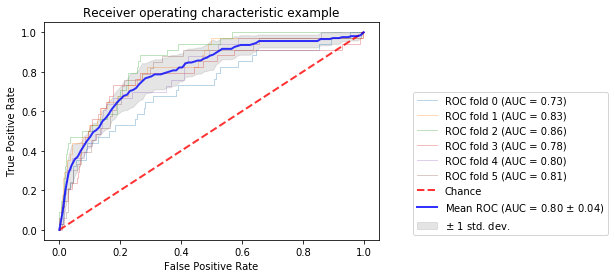

Classifier  DT
Test  CV Splits 6 
 acc 0.728 +- 0.057 pre 0.707 +- 0.090 rec 0.161 +- 0.024 fs 0.261 +- 0.032 auc 0.772 +- 0.032
Validation set:
tn 522 fp 205 fn 2 tp 31
tpr: 0.131 fpr 0.282 auc 0.71 
a: 0.728 p 0.939 r 0.131 f 0.230
TN 0.72 TP 0.94


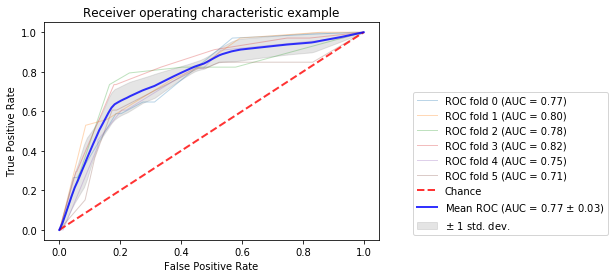

Classifier  RF
Test  CV Splits 6 
 acc 0.874 +- 0.011 pre 0.470 +- 0.043 rec 0.258 +- 0.035 fs 0.333 +- 0.038 auc 0.799 +- 0.033
Validation set:
tn 664 fp 63 fn 4 tp 29
tpr: 0.315 fpr 0.087 auc 0.69 
a: 0.912 p 0.879 r 0.315 f 0.464
TN 0.91 TP 0.88


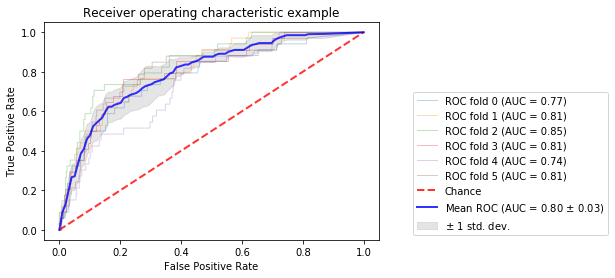

Classifier  PCAKNN
Test  CV Splits 6 
 acc 0.931 +- 0.003 pre 0.000 +- 0.000 rec nan +- nan fs nan +- nan auc 0.544 +- 0.032
Validation set:
tn 726 fp 1 fn 33 tp 0
tpr: 0.000 fpr 0.001 auc 0.50 
a: 0.955 p 0.000 r 0.000 f nan
TN 1.00 TP 0.00


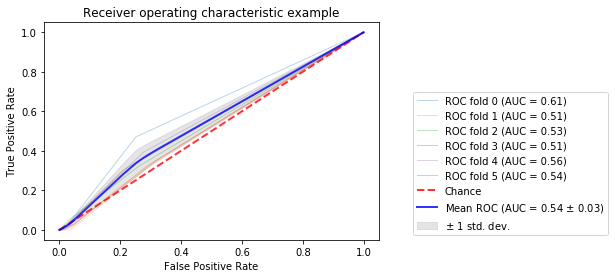

Classifier  KNN
Test  CV Splits 6 
 acc 0.887 +- 0.003 pre 0.104 +- 0.022 rec 0.114 +- 0.018 fs 0.109 +- 0.020 auc 0.523 +- 0.010
Validation set:
tn 727 fp 0 fn 0 tp 33
tpr: 1.000 fpr 0.000 auc 0.52 
a: 1.000 p 1.000 r 1.000 f 1.000
TN 1.00 TP 1.00


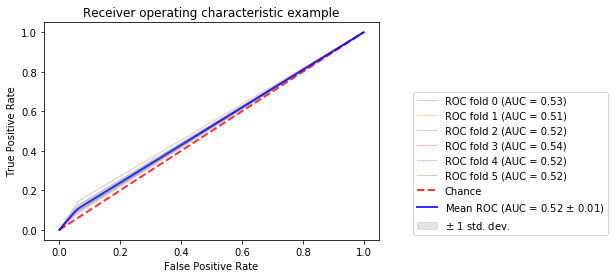

Classifier  XGB
Test  CV Splits 6 
 acc 0.931 +- 0.006 pre 0.089 +- 0.048 rec 0.409 +- 0.180 fs 0.145 +- 0.076 auc 0.787 +- 0.036
Validation set:
tn 727 fp 0 fn 5 tp 28
tpr: 1.000 fpr 0.000 auc 0.56 
a: 0.993 p 0.848 r 1.000 f 0.918
TN 1.00 TP 0.85


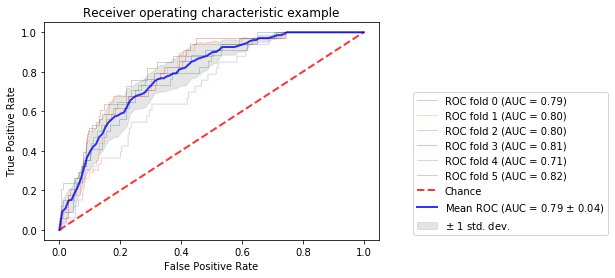

In [46]:
for key in clfs_results.keys():
    print("Classifier ", key)
    model =clfs_results[key][2]['best_model']
    cross_roc_validation(model, key, X_grid, y_grid, X_test_o, y_test_o, splits=6)

In [47]:
model = clfs_results['RF'][2]['best_model']
from sklearn.externals import joblib
joblib.dump(model, 'RFCV2_compra_nois.joblib') 

['RFCV2_compra_nois.joblib']

             precision    recall  f1-score   support

         -1       1.00      0.89      0.94       727
          1       0.29      1.00      0.46        33

avg / total       0.97      0.90      0.92       760

[[648  79]
 [  0  33]]
AUC:  0.9682797715810095
Point in ROC 0.10866574965612105 0.29464285714285715


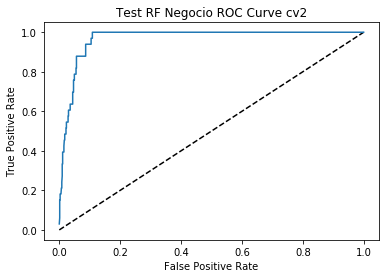

Normalized confusion matrix


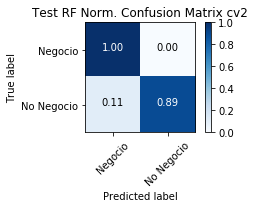

Confusion matrix, without normalization


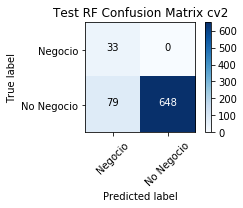

In [68]:
model_name = 'RF'
model =clfs_results[model_name][2]['best_model']
# model.fit(X_grid,y_grid)
y_pred = model.predict(X_test_o)
y_proba = model.predict_proba(X_test_o)[:,1]
# predict_mine = np.where(y_proba > 0.989, 1, 0)
print(classification_report(y_test_o, y_pred ))
print(confusion_matrix(y_test_o, y_pred))
roc_curve_plot(model, X_test_o, y_test_o,  title='Test {} Negocio ROC Curve cv{}'.format(model_name, 2))
plot_confusion_matrix(y_test_o, y_pred, ['Negocio', 'No Negocio'] ,  \
                      title='Test {} Norm. Confusion Matrix cv{}'.format(model_name, 2), normalize=True)
plot_confusion_matrix(y_test_o, y_pred, ['Negocio', 'No Negocio'] ,  \
                      title='Test {} Confusion Matrix cv{}'.format(model_name, 2), normalize=False)

(760, 50) (760, 1) (760,)


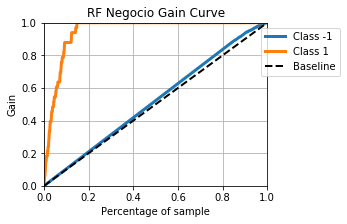

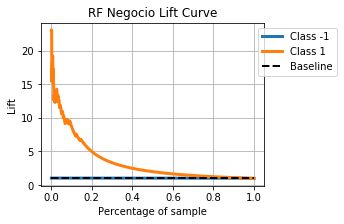

No handles with labels found to put in legend.


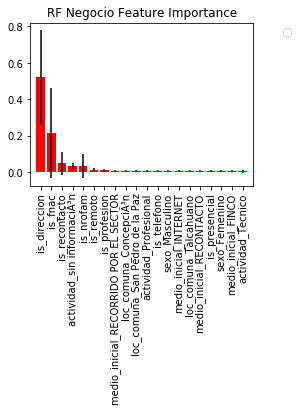

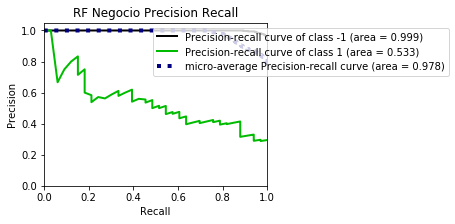

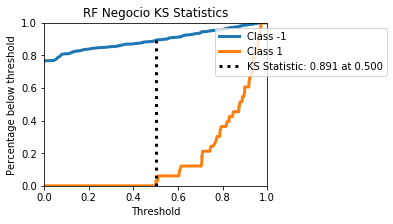

In [69]:
model = clfs_results[model_name][2]['best_model']
y_pred = model.predict(X_test_o)
y_probas = model.predict_proba(X_test_o)

print(X_test_o.shape, y_test_o.shape, y_proba.shape)
classifier_insights(y_test_o, y_probas, model, f_importance = True, model_name='RF Negocio')

# PREDICT ONE CLIENTE

In [278]:
model_name = 'RF'
probas = clfs_results[model_name][2]['best_model'].predict_proba(X_test_o)[:,1]
y_pred = clfs_results[model_name][2]['best_model'].predict(X_test_o)

In [279]:
print(len(probas), len(y_pred))

760 760


In [280]:
b_personas = copy.deepcopy(personas)
b_p_negocio = copy.deepcopy(p_target)

In [281]:
b_personas = b_personas.loc[X_test_o.index]
b_p_negocio = b_p_negocio.loc[X_test_o.index]

In [282]:
b_personas['y_pred'] = y_pred
b_personas['probas'] = probas

In [283]:
print(b_personas.shape)
b_personas.head(1)

(760, 52)


,is_apellido1,is_apellido2,is_celular,is_direccion,is_fnac,is_nombre,is_nombrecompleto,is_nrofam,is_presencial,is_profesion,...,medio_inicial_RECORRIDO POR EL SECTOR,medio_inicial_REFERIDOS,medio_inicial_REVISTAS,medio_inicial_TV,medio_inicial_VOLANTES,sexo_Femenino,sexo_Masculino,sexo_sin informaciÃ³n,y_pred,probas
1573,True,True,True,False,False,True,True,False,True,False,...,0,0,0,0,0,1,0,0,1,0.578005


In [296]:
# personas_original.loc[1573]

In [297]:
info = personas_original.loc[[1573]].merge(personas_info, left_on='rut', right_on='rut', how='left')
info[['nombre','y_pred']]

KeyError: "['y_pred'] not in index"

In [284]:
b_personas.drop(['y_pred', 'probas'], axis=1, inplace=True)

In [285]:
print(clfs_results[model_name][2]['best_model'].predict(b_personas.head(1)))
print(clfs_results[model_name][2]['best_model'].predict_proba(b_personas.head(1))[:,1])
print(clfs_results[model_name][2]['best_model'].predict_proba(b_personas.head(1)))

[1]
[0.57800517]
[[0.42199483 0.57800517]]


# PREDICT LISTS OF CLIENTS

In [298]:
#Copia de X_test_o para no mancharlo
b_personas = copy.deepcopy(X_test_o)
b_p_negocio = copy.deepcopy(y_test_o)


In [299]:
# revisando que los indices corresponden
both = set(X_test_o.index) & set(y_test_o.index)
len(both)

760

In [310]:
# revisando el largo de los sets
print(b_personas.shape, b_p_negocio.shape, probas.shape)

#prediciendo probas y pred para X_test_o
probas = clfs_results[model_name][2]['best_model'].predict_proba(X_test_o)[:,1]
y_pred = clfs_results[model_name][2]['best_model'].predict(X_test_o)

#uniendo predicion y probas a set inicial (faltan datos personales)
b_personas['target'] = b_p_negocio
b_personas['y_pred'] = y_pred
b_personas['t_proba'] = [ x for x in probas.tolist()]


#Comprobando las predicciones
results = b_personas
# print(results.shape)
# print('tp: ',results[(results.target==1) & (results.y_pred==1)]['target'].count())
# print('fn: ',results[(results.target==1) & (results.y_pred==-1)]['target'].count())
# print('fp: ',results[(results.target==-1) & (results.y_pred==1)]['target'].count())
# print('tn: ',results[(results.target==-1) & (results.y_pred==-1)]['target'].count())

(760, 53) (760, 1) (760,)


In [312]:
new = personas_original.merge(b_personas, left_index=True, right_index=True)
new.shape

(760, 100)

In [314]:
new2 = new.merge(personas_info, left_on='rut', right_on='rut', how='left')
new2.shape

(760, 154)

In [318]:
new2.columns.tolist()

['Unnamed: 0',
 'actividad_x',
 'compra_x',
 'is_apellido1_x',
 'is_apellido2_x',
 'is_celular_x',
 'is_descuento_x',
 'is_direccion_x',
 'is_fnac_x',
 'is_nombre_x',
 'is_nombrecompleto_x',
 'is_nrofam_x',
 'is_presencial_x',
 'is_profesion_x',
 'is_recontacto_x',
 'is_remoto_x',
 'is_telefono_x',
 'loc_comuna_x',
 'loc_provincia_x',
 'loc_region_x',
 'max_rango_edad_x',
 'mean_cot_bod_x',
 'mean_cot_depto_x',
 'mean_cot_esta_x',
 'mean_cot_estu_x',
 'medio_inicial_x',
 'negocio_x',
 'nro_cot_bod_x',
 'nro_cot_depto_x',
 'nro_cot_esta_x',
 'nro_cot_estu_x',
 'nro_proyectos_x',
 'precio_cotizacion_media_x',
 'precio_cotizacion_median_x',
 'precio_cotizacion_std_x',
 'rut',
 'sexo_x',
 'tiempo_cotizacion_media_x',
 'tiempo_cotizacion_median_x',
 'tiempo_cotizacion_std_x',
 'tipo_cliente_x',
 'valid_rut_x',
 'Altos del Valle_x',
 'Edificio Urban 1470_x',
 'San Andres Del Valle_x',
 'Edificio Mil610_x',
 'Edificio Junge_x',
 'is_apellido1_y',
 'is_apellido2_y',
 'is_celular_y',
 'is_direccion_y',
 'is_fnac_y',
 'is_nombre_y',
 'is_nombrecompleto_y',
 'is_nrofam_y',
 'is_presencial_y',
 'is_profesion_y',
 'is_recontacto_y',
 'is_remoto_y',
 'is_telefono_y',
 'actividad_DueÃ±a de casa',
 'actividad_Empleado',
 'actividad_Estudiante',
 'actividad_Independiente (no profesional)',
 'actividad_Profesional',
 'actividad_Tecnico',
 'actividad_sin informaciÃ³n',
 'loc_comuna_Chiguayante',
 'loc_comuna_ConcepciÃ³n',
 'loc_comuna_Coronel',
 'loc_comuna_HualpÃ©n',
 'loc_comuna_Los Ã\x81ngeles',
 'loc_comuna_Otro',
 'loc_comuna_Penco',
 'loc_comuna_San Pedro de la Paz',
 'loc_comuna_Talcahuano',
 'loc_provincia_Concepcion',
 'loc_provincia_Otro',
 'loc_provincia_Santiago',
 'loc_region_Bio-Bio',
 'loc_region_Metropolitana',
 'loc_region_Otro',
 'medio_inicial_EVENTOS',
 'medio_inicial_FINCO',
 'medio_inicial_INTERNET',
 'medio_inicial_LETREROS',
 'medio_inicial_PRENSA',
 'medio_inicial_RADIO',
 'medio_inicial_RECONTACTO',
 'medio_inicial_RECORRIDO POR EL SECTOR',
 'medio_inicial_REFERIDOS',
 'medio_inicial_REVISTAS',
 'medio_inicial_TV',
 'medio_inicial_VOLANTES',
 'sexo_Femenino',
 'sexo_Masculino',
 'sexo_sin informaciÃ³n',
 'target',
 'y_pred',
 't_proba',
 'actividad_y',
 'apellido1',
 'apellido2',
 'celular',
 'compra_y',
 'correo',
 'direccion',
 'edad',
 'is_apellido1',
 'is_apellido2',
 'is_celular',
 'is_descuento_y',
 'is_direccion',
 'is_fnac',
 'is_nombre',
 'is_nombrecompleto',
 'is_nrofam',
 'is_presencial',
 'is_profesion',
 'is_recontacto',
 'is_remoto',
 'is_telefono',
 'loc_comuna_y',
 'loc_provincia_y',
 'loc_region_y',
 'max_rango_edad_y',
 'mean_cot_bod_y',
 'mean_cot_depto_y',
 'mean_cot_esta_y',
 'mean_cot_estu_y',
 'medio_inicial_y',
 'negocio_y',
 'nombre',
 'nro_cot_bod_y',
 'nro_cot_depto_y',
 'nro_cot_esta_y',
 'nro_cot_estu_y',
 'nro_proyectos_y',
 'precio_cotizacion_media_y',
 'precio_cotizacion_median_y',
 'precio_cotizacion_std_y',
 'rut_original',
 'sexo_y',
 'tiempo_cotizacion_media_y',
 'tiempo_cotizacion_median_y',
 'tiempo_cotizacion_std_y',
 'tipo_cliente_y',
 'trabajo',
 'valid_rut_y',
 'Altos del Valle_y',
 'Edificio Urban 1470_y',
 'San Andres Del Valle_y',
 'Edificio Mil610_y',
 'Edificio Junge_y']

In [325]:
new2[['rut','nombre','correo','t_proba', 'y_pred','target','nro_cot_depto_y','nro_cot_depto_x']]

,rut,nombre,correo,t_proba,y_pred,target,nro_cot_depto_y,nro_cot_depto_x
0,000.000.000-0,Mariacruz,mariacruz.garreton@gmail.com,0.245732,-1,-1,2.0,2.0
1,10.033.390-2,Jorge Alexis,jorge.alexis.henriquez@gmail.com,0.452571,-1,1,10.0,10.0
2,10.037.368-8,Maria Alejandra,m.janita@hotmail.com,0.222968,-1,-1,1.0,1.0
3,10.038.900-2,Gilda Elizabeth,gilda.inzunza@hotmail.com / edier.vasquez@quar...,0.927278,1,1,5.0,5.0
4,10.069.788-2,Pablo Javier,pablo.crespell@arauco.cl,0.963752,1,1,4.0,4.0
5,10.075.429-0,Fernando Patricio,furrea@torval.cl,0.681341,1,-1,1.0,1.0
6,10.075.441-k,Jose Luis,j.aravena.ulloa@gmail.com,0.092764,-1,-1,1.0,1.0
7,10.080.393-3,Luis,luaraya@crossvillefabric.com,0.118984,-1,-1,1.0,1.0
8,10.094.196-1,Eduardo Antonio,...............,0.138146,-1,-1,1.0,1.0
9,10.161.184-1,Pedro,pedro.espinoza@itepro.cl,0.380378,-1,-1,2.0,2.0


In [304]:
info = new.merge(personas_info, left_on='rut', right_on='rut', how='left')

In [309]:
info[['nombre', 'y_pred', 'target', 't_proba']]

KeyError: "['y_pred' 'target' 't_proba'] not in index"

In [218]:
personas_original.shape

(3816, 55)

In [220]:
#buscando los datos personales de las personas de X_test_0 con sus indices, se comprueba que estan todos
personas_info.loc[results.index].shape

(764, 55)

In [221]:
# se traen estos datos desde el conjunto con información personal
new = personas_info.loc[results.index]
# se les agrega las probas y pred hechos con X_test_o
new['t_probas'] = probas
new['y_pred_negocio'] = y_pred
new['target'] = b_personas['target']
new.head()

,actividad,apellido1,apellido2,celular,compra,correo,direccion,edad,is_apellido1,is_apellido2,...,trabajo,valid_rut,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge,t_probas,y_pred_negocio,target
1585,Empleado,Mosqueira,Rivas,982172591,0.0,vmosqueirarivas@gmail.com,NaN,41-50,1.0,1.0,...,NaN,1.0,0.0,0.0,5.0,0.0,0.0,0.462899,-1,-1
2779,sin información,Valdes,Sandoval,975397357,0.0,jotavaldes@gmail.com,NaN,NaN,1.0,1.0,...,NaN,1.0,0.0,0.0,5.0,0.0,0.0,0.018078,-1,-1
3858,Profesional,Jara,Mella,95964594,0.0,pablojarame@gmail.com,Los Robles 814,31-40,1.0,1.0,...,Médico,1.0,0.0,0.0,4.0,0.0,0.0,0.895512,1,1
2835,Profesional,Cisternas,Torres,77577214,1.0,Edsonycis@gmail.com,Calle 4 Condominio 1063 casa Lomas de Bellavis...,31-40,1.0,1.0,...,Kinesiologo,1.0,0.0,0.0,4.0,0.0,0.0,0.994090,1,1
1760,sin información,Henriquez,Urrutia,984640811,0.0,hectorenri@gmail.com,NaN,Sin Información,1.0,1.0,...,NaN,1.0,0.0,0.0,1.0,0.0,0.0,0.018078,-1,-1


In [124]:
new.columns

Index(['actividad', 'apellido1', 'apellido2', 'celular', 'compra', 'correo',
       'direccion', 'edad', 'is_apellido1', 'is_apellido2', 'is_celular',
       'is_descuento', 'is_direccion', 'is_fnac', 'is_nombre',
       'is_nombrecompleto', 'is_nrofam', 'is_presencial', 'is_profesion',
       'is_recontacto', 'is_remoto', 'is_telefono', 'loc_comuna',
       'loc_provincia', 'loc_region', 'max_rango_edad', 'mean_cot_bod',
       'mean_cot_depto', 'mean_cot_esta', 'mean_cot_estu', 'medio_inicial',
       'negocio', 'nombre', 'nro_cot_bod', 'nro_cot_depto', 'nro_cot_esta',
       'nro_cot_estu', 'nro_proyectos', 'precio_cotizacion_media',
       'precio_cotizacion_median', 'precio_cotizacion_std', 'rut',
       'rut_original', 'sexo', 'tiempo_cotizacion_media',
       'tiempo_cotizacion_median', 'tiempo_cotizacion_std', 'tipo_cliente',
       'trabajo', 'valid_rut', 'Altos del Valle', 'Edificio Urban 1470',
       'San Andres Del Valle', 'Edificio Mil610', 'Edificio Junge', 't_probas',
 

In [127]:
new[['rut','y_pred_negocio', 't_probas', 'target','rut_original','sexo','celular', 'correo','direccion', 'edad','nombre', 'apellido1', 'apellido2']]

,rut,y_pred_negocio,t_probas,target,rut_original,sexo,celular,correo,direccion,edad,nombre,apellido1,apellido2
1573,13.581.508-K,1,0.578005,-1,13581508-K,Masculino,974958716,gonzalo.sierra.c@gmail.com,av. jose rabad 9960 chicureo,31-40,gonzalo,sierra,caceres
554,11.613.351-2,-1,0.347628,-1,11613351-2,Femenino,84494355,loreto@muffeler.cl,NaN,31-40,María Loreto,Alarcón,Muffeler
1292,13.133.431-1,-1,0.090333,-1,13133431-1,Masculino,72168668,armando.silva@fesup.cl,NaN,Sin Información,Armando,Silva,Placencia
310,10.691.607-1,-1,0.483253,-1,10691607-1,Femenino,998213773,paogonza@gmail.com,NaN,NaN,Paola,González,Kother
4970,18.416.429-9,1,0.552840,-1,18416429-9,Masculino,62197744,arqnuveo@gmail.com,NaN,Sin Información,Luis,Inostroza,NaN
5502,7.485.241-6,-1,0.246885,-1,7485241-6,Femenino,99101100,ubersildo1923@gmail.com,NaN,Sin Información,Hilda,Silva,Salazar
2568,15.182.084-0,-1,0.274814,1,15182084-0,Masculino,966077927,luis.santander.pardo@gmail.com,NaN,31-40,Luis,Santander,Pardo
2247,14.393.388-1,-1,0.046035,-1,14393388-1,Masculino,987371977,juan.zuniga@eserma.cl,"Brisas del Sol, Calle 7 6196",31-40,Juan Josè,Zuñiga,Agurto
1517,13.508.270-8,-1,0.164061,-1,13508270-8,Femenino,78808309,smarchan@udec.cl / sylviamarchantp@gmail.com,"Pasaje Los Lilenes, Jardines de antilhue 459",31-40,Sylvia Andrea,Marchant,Parra
1963,14.066.513-4,1,0.960240,1,14066513-4,Masculino,81574572,jaimearriagada.c@gmail.com,Avenida Arturo Prat. Condominio Mares del Sur,31-40,Jaime Ricardo,Arriagada,Contreras


In [105]:
#se revisa la inforacion personal
new.head(1)

,actividad,apellido1,apellido2,celular,compra,correo,direccion,edad,is_apellido1,is_apellido2,...,tiempo_cotizacion_median,tiempo_cotizacion_std,tipo_cliente,trabajo,valid_rut,Altos del Valle,Edificio Urban 1470,San Andres Del Valle,Edificio Mil610,Edificio Junge
1573,Profesional,sierra,caceres,974958716,0.0,gonzalo.sierra.c@gmail.com,av. jose rabad 9960 chicureo,31-40,1.0,1.0,...,226.0,226.0,Natural,Ingeniero Comercial,1.0,0.0,0.0,0.0,0.0,1.0


# PREDICT FOT PERSON IN LIST

In [95]:
# se botan las columnas agregadas al set inicial de información de las personas
new.drop(['y_pred_negocio', 't_probas', 'target'], axis=1, inplace=True)

In [98]:
#se toma la primera persona en la lista
to_predict = new.head(1)
#se escogen las variables predictoras
to_predict = to_predict[is_no_time_price]
#se realiza la dummizacion
to_predict = pd.get_dummies(to_predict)
# se vericica el largo de las filas del dummy para que calzen con las del modelo
to_predict.shape

(1, 50)

In [99]:
# se predice con el modelo para la persona anterior
clfs_results[model_name][2]['best_model'].predict_proba(to_predict)[:,1]

array([0.90717784])

In [101]:
personas_info.merge(x, left_index=True, right_index=True).columns.tolist()

NameError: name 'x' is not defined

In [102]:
m = personas_original.merge(X_test_o, left_index=True, right_index=True)
m['t_proba'] = clfs_results[model_name][2]['best_model'].predict_proba(X_test_o)[:,1]
m['y_pred'] = clfs_results[model_name][2]['best_model'].predict(X_test_o)
m[['rut','t_proba', 'y_pred', 'negocio']]

,rut,t_proba,y_pred,negocio
0,000.000.000-0,0.578005,1,False
21,10.033.390-2,0.347628,-1,True
24,10.037.368-8,0.090333,-1,False
28,10.038.900-2,0.483253,-1,True
46,10.069.788-2,0.552840,1,True
49,10.075.429-0,0.246885,-1,False
50,10.075.441-k,0.274814,-1,False
54,10.080.393-3,0.046035,-1,False
56,10.094.196-1,0.164061,-1,False
71,10.161.184-1,0.960240,1,False


In [332]:
def format_rut(x):
    rut = x.split('-')
    l_s = list(rut[0])
    r_l = l_s[::-1]
    new = []
    i = 0
    new.append(rut[1])
    new.append('-')
    for c in r_l:
        if i==3:
            new.append('.')
            i = 0
        new.append(c)
        i +=1
    rut = ''.join(new[::-1])
    return rut

def negocio_rank_callback(modelo, rut):
    tmp_personas = copy.deepcopy(personas_info)

    predictors = no_is_time_price

    rut = format_rut(rut) 
    
    to_predict = tmp_personas[tmp_personas.rut == rut]
    print(to_predict)
    index = to_predict.index
    # target = tmp_personas.negocio
    p_personas = tmp_personas[predictors]
    d_personas = pd.get_dummies(p_personas)

    to_predict = d_personas.loc[index]

    y_proba = modelo.predict_proba(to_predict)
    y_pred = modelo.predict(to_predict)
    print('Negocio', y_proba, y_pred)
#     p = html.H3('%.4f' % y_proba[:,1])
    return p

In [333]:
modelo = clfs_results[model_name][2]['best_model']
negocio_rank_callback(modelo, "10033390-2")

      actividad  apellido1 apellido2   celular  compra  \
21  Profesional  Henriquez      Mery  54043387     0.0   

                              correo direccion   edad  is_apellido1  \
21  jorge.alexis.henriquez@gmail.com       NaN  41-50           1.0   

    is_apellido2       ...        tiempo_cotizacion_median  \
21           1.0       ...                             2.0   

    tiempo_cotizacion_std  tipo_cliente   trabajo  valid_rut  Altos del Valle  \
21                    2.0       Natural  Contador        1.0              0.0   

    Edificio Urban 1470  San Andres Del Valle  Edificio Mil610  Edificio Junge  
21                  0.0                  10.0              0.0             0.0  

[1 rows x 55 columns]


ValueError: Number of features of the model must match the input. Model n_features is 50 and input n_features is 55 